### Project 3 – German Credit Dataset
Due on Thu 7th Apr 11:59pm EST
Context: The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by
Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person
is classified as good or bad credit risks according to the set of attributes. It is difficult to understand the
original dataset due to its complicated system of categories and symbols. Thus, several columns are
simply ignored, because they are not important, or their descriptions are obscure. The selected
attributes are:
• Age (numeric)
• Sex (text: male, female)
• Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly
skilled)
• Housing (text: own, rent, or free)
• Saving accounts (text - little, moderate, quite rich, rich)
• Checking account (numeric, in DM - Deutsch Mark)
• Credit amount (numeric, in DM)
• Duration (numeric, in month)
• Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education,
business, vacation/others)
• Risk (Target value - Good or Bad Risk)
Dataset Source: Click here
Task: Goal of this project is to cluster the customers and classify whether an applicant is considered a
Good or a Bad credit risk for 1000 loan applicants
Implementation:
- Perform EDA and any data cleaning if necessary.
- Perform one hot encoding for categorical variables
- Visualize the histograms of numerical features. Do you observe skewness in the data? If yes
apply the log transformation. Check the histograms again to see if data has been normalized.
- Apply Feature Scaling
- Choose only the numerical features for clustering
- Apply elbow method to find best number of clusters. Plot the graph.
- Choose optimum number of clusters and visualize it using PCA
- Implement KFOLD CV and use any classifier of your choosing and report the evaluation metrics
Submission Instructions: Please just submit one jupyter notebook containing all the code and make use
of markdown cells to include the comments, answers, reasoning, analysis, etc.
Note: Name of your file should be your “Project3-id_Firstname_Lastname.ipynb”

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings(action='ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, silhouette_score

In [2]:
# Read data
german_credit_data = pd.read_excel("german_credit_data.xlsx")
df = pd.DataFrame(german_credit_data)
# View the first few rows of the data
print(df.columns)
df.head()

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
# View the last few rows of the data
df.tail(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,27,male,2,own,moderate,moderate,4576,45,car,good


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [5]:
df['Risk'].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

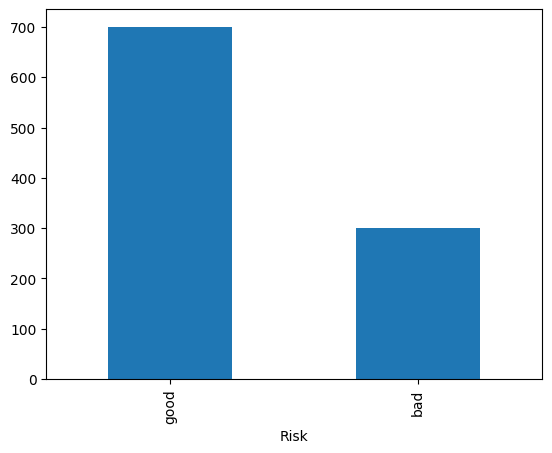

In [6]:
df['Risk'].value_counts().plot.bar()
plt.show()

### Perform EDA and any data cleaning if necessary.

In [7]:
# Data cleaning
# Check for missing values
print(df.isnull().sum())
print(df.describe())

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64
               Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000


In [8]:
# Finding out unique variables
print('The unique value of Purpose is:',df.Purpose.unique())
print('The unique value of Sex is:',df.Sex.unique())
print('The unique value of Housing is:',df.Housing.unique())
print('The unique value of Checking account is:',df['Checking account'].unique())
print('The unique value of Saving accounts is:',df['Saving accounts'].unique())

The unique value of Purpose is: ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
The unique value of Sex is: ['male' 'female']
The unique value of Housing is: ['own' 'free' 'rent']
The unique value of Checking account is: ['little' 'moderate' nan 'rich']
The unique value of Saving accounts is: [nan 'little' 'quite rich' 'rich' 'moderate']


In [9]:
# Fill the missing values
df.fillna(method='bfill', inplace=True)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [10]:
# Seperate categorical and numerical columns
numerical = ['Job','Credit amount','Age','Duration']
categorical = ['Sex','Housing','Saving accounts','Checking account','Purpose','Risk']
df.shape

(1000, 10)

In [11]:
# Display categorical data
cat = df.select_dtypes(include=['object']).columns
cat_df = df[cat]
cat_df

,Sex,Housing,Saving accounts,Checking account,Purpose,Risk
0,male,own,little,little,radio/TV,good
1,female,own,little,moderate,radio/TV,bad
2,male,own,little,little,education,good
3,male,free,little,little,furniture/equipment,good
4,male,free,little,little,car,bad
...,...,...,...,...,...,...
995,female,own,little,little,furniture/equipment,good
996,male,own,little,little,car,good
997,male,own,little,little,radio/TV,good
998,male,free,little,little,radio/TV,bad


In [12]:
# Display numerical data
num = df.select_dtypes(exclude=['object']).columns
num_df = df[num]
num_df

,Age,Job,Credit amount,Duration
0,67,2,1169,6
1,22,2,5951,48
2,49,1,2096,12
3,45,2,7882,42
4,53,2,4870,24
...,...,...,...,...
995,31,1,1736,12
996,40,3,3857,30
997,38,2,804,12
998,23,2,1845,45


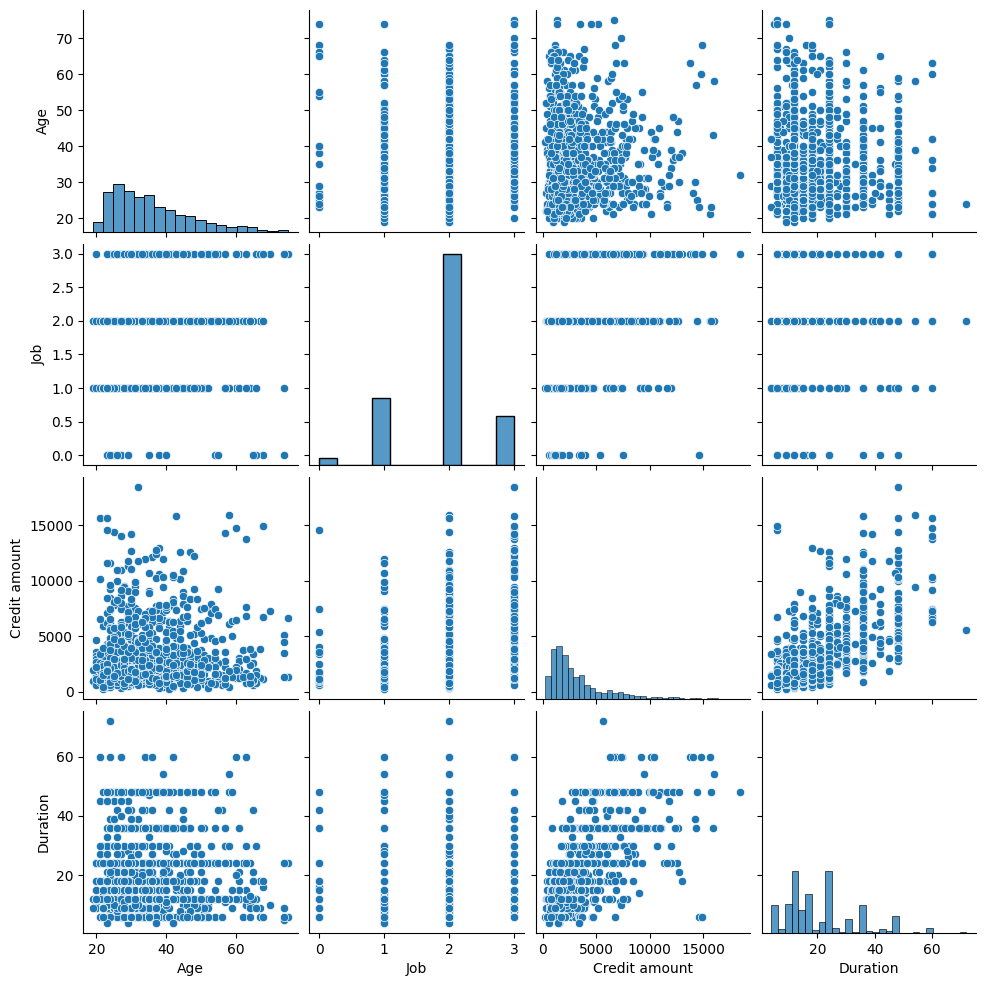

In [13]:
# View the distribution of numerical features
sns.pairplot(df)

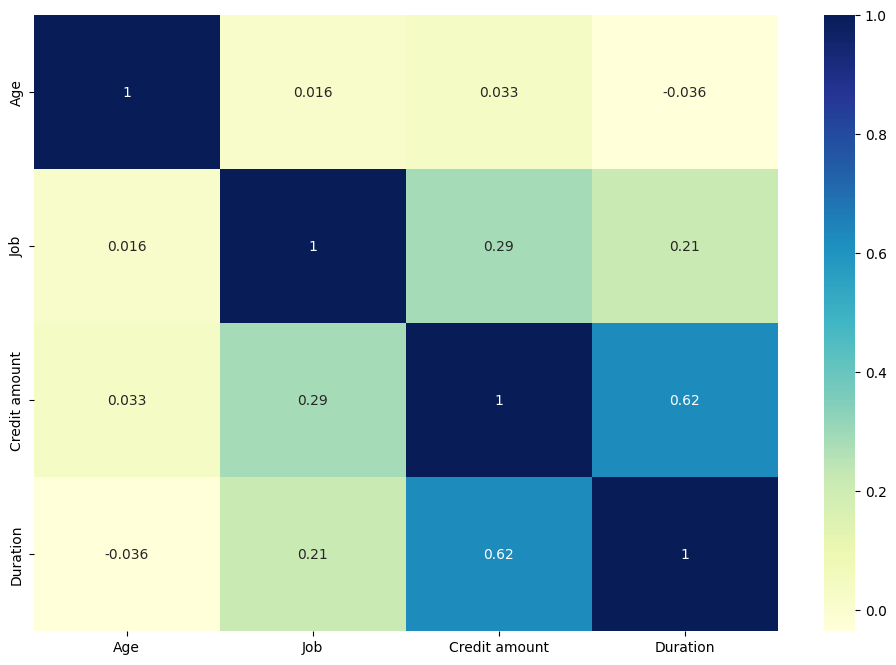

In [14]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(numeric_only=True),annot = True, cmap='YlGnBu')
plt.show()

### Perform one hot encoding for categorical variables

In [15]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical, drop_first=True)
df_encoded.head()

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_good
0,67,2,1169,6,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1,22,2,5951,48,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False
2,49,1,2096,12,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
3,45,2,7882,42,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
4,53,2,4870,24,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


### Visualize the histograms of numerical features. Do you observe skewness in the data? If yes apply the log transformation. Check the histograms again to see if data has been normalized.

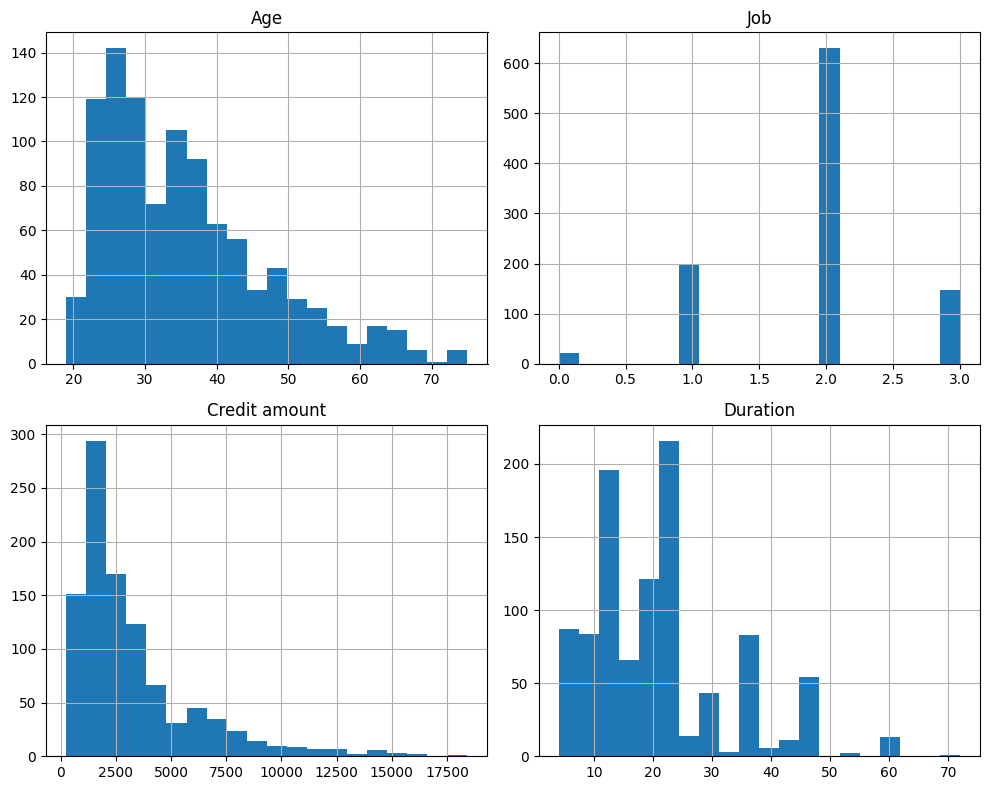

Skewness:
Age              1.020739
Job             -0.374295
Credit amount    1.949628
Duration         1.094184
dtype: float64


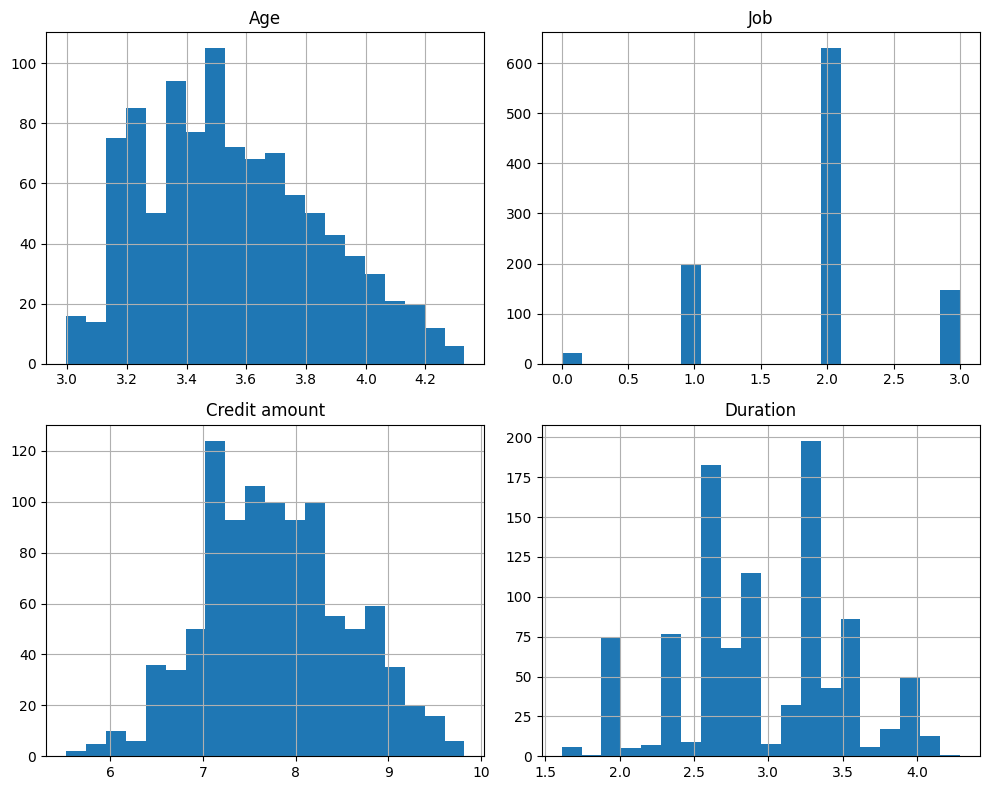

In [16]:
# Select numerical features
numerical = ['Age','Job','Credit amount','Duration']

# Plot histograms for each numerical feature
df[numerical].hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

# Check for skewness
skewness = df[numerical].skew()
print("Skewness:")
print(skewness)

# Apply log transformation to features with skewness greater than 1
skewed_features = skewness[skewness > 1].index
df[skewed_features] = df[skewed_features].apply(lambda x: np.log1p(x))

# Plot histograms again
df[numerical].hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

In [17]:
# Apply Feature Scaling
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_encoded)

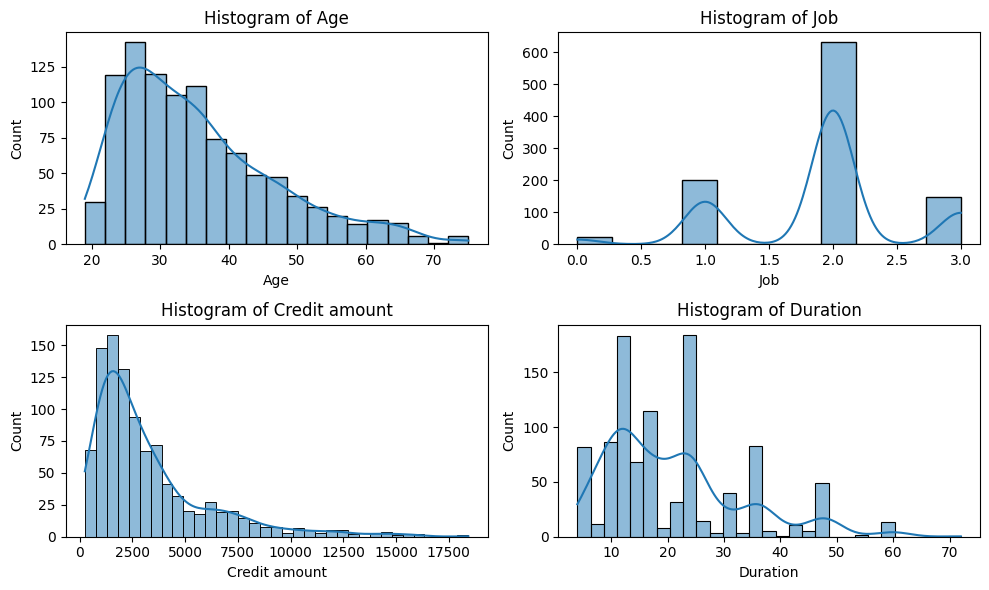

In [18]:
# Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize histograms of numerical features
plt.figure(figsize=(10, 6))
for i, feature in enumerate(numerical, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_encoded[feature], kde=True)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

### Choose only the numerical features for clustering

In [19]:
# Choose only numerical features for clustering
X = scaled_df[:, :len(numerical)]

# Apply elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

### Apply elbow method to find best number of clusters. Plot the graph.

In [20]:
# Select Optimal K value from results.
T_inertia = pd.DataFrame({'K': range(1, 11), 'Inertia': inertia})

T_inertia['Difference'] = T_inertia['Inertia'].diff()
T_inertia['Difference_2'] = T_inertia['Difference'].diff()

max_diff_2_index = T_inertia['Difference_2'].idxmax()-1

max_diff_2_K_value = T_inertia.loc[max_diff_2_index, 'K']
max_diff_2_inertia_value = T_inertia.loc[max_diff_2_index, 'Inertia']

print("Optimal K :",max_diff_2_K_value)


Optimal K : 2


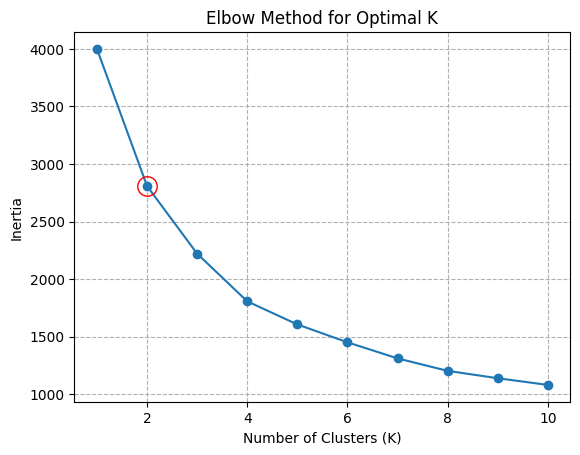

In [21]:
# Plot the elbow plot
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True, linestyle='--')

# Optimal K
plt.plot(max_diff_2_K_value, max_diff_2_inertia_value, 'ro', markersize=14, fillstyle='none')

plt.show()

### Choose optimum number of clusters and visualize it using PCA

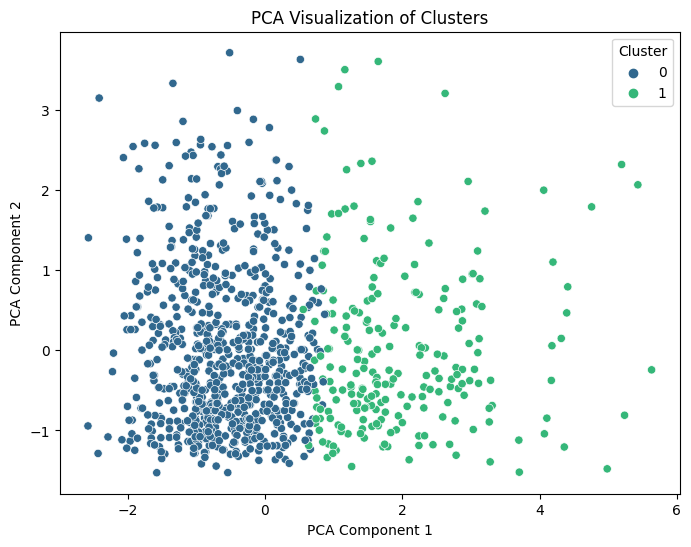

In [22]:
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=cluster_labels, palette='viridis')
plt.title('PCA Visualization of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

### Implement KFOLD CV and use any classifier of your choosing and report the evaluation metrics

In [23]:
# making variable x,y and drop 'Risk' column
y = df_encoded['Risk_good']
X = df_encoded.drop(columns = ['Risk_good'])

# Train Test Splitting
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size = 0.20, random_state = 0)

In [24]:
# Shape of Train Test Prediction
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (800, 19)
X_test shape: (200, 19)
y_train shape: (800,)
y_test shape: (200,)


In [25]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, silhouette_score

rfc = RandomForestClassifier(n_estimators=200)

# Implement K-fold cross-validation
cv_scores = cross_val_score(rfc, X_train, y_train, cv=5)

# Print accuracy for each fold
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i} Accuracy: {score}")    
print("\n")

# Train the classifier
rfc.fit(X_train,y_train)


Fold 1 Accuracy: 0.73125
Fold 2 Accuracy: 0.74375
Fold 3 Accuracy: 0.70625
Fold 4 Accuracy: 0.70625
Fold 5 Accuracy: 0.6625




RandomForestClassifier(n_estimators=200)

In [26]:
# Evaluate classifier performance
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.71
              precision    recall  f1-score   support

       False       0.50      0.33      0.40        58
        True       0.76      0.87      0.81       142

    accuracy                           0.71       200
   macro avg       0.63      0.60      0.60       200
weighted avg       0.68      0.71      0.69       200



### Comment
The model performs well in identifying samples with "good" applicants' credit risk, with high precision, recall, and F1-score. However, the performance is poor in identifying samples with "bad" applicants' credit risk, with lower precision, recall and F1-score. The overall accuracy of the model is 71%, but further improvements are needed to improve the recognition of "bad" categories.